# Estudo de caso em R

Os dados usados nesta análise está disponíveis no site abaixo em "Recursos", depois "Benefícios concedidos maio 2023
":
- https://dados.gov.br/dados/conjuntos-dados/inss-beneficios-concedidos1

O exemplo abaixo repete a análise mostrada anteriormente agora feita na linguagem R. Usamos opções adicionais devido ao formato da planilha: ``sep`` para usar o separador ``;`` das colunas, ``fileEncoding`` para definir a codificação de caracteres como acentos. A saída do código mostra as colunas lidas de um total de 508 mil linhas.


In [52]:
inss_maio_2023 <- read.csv('D.SDA.PDA.001.CON.202305.csv', sep=';', fileEncoding="latin1")
summary(inss_maio_2023)

 Competência.concessão   Espécie              CID              Despacho        
 Min.   :202305        Length:508583      Length:508583      Length:508583     
 1st Qu.:202305        Class :character   Class :character   Class :character  
 Median :202305        Mode  :character   Mode  :character   Mode  :character  
 Mean   :202305                                                                
 3rd Qu.:202305                                                                
 Max.   :202305                                                                
 Dt.Nascimento         Sexo.            Clientela         Tipo.de.Cálculo   
 Length:508583      Length:508583      Length:508583      Length:508583     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                       

Abaixo segue uma amostra dos dados da tabela com a função ``head()``.

In [37]:
head( inss_maio_2023 )

,Competência.concessão,Espécie,CID,Despacho,Dt.Nascimento,Sexo.,Clientela,Tipo.de.Cálculo,Mun.Resid,Vínculo.dependentes,Forma.Filiação,UF,Qt.SM.RMI
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,202305,Amp. Social Pessoa Portadora Deficiencia,G80.9 Paralisia Cerebral Infantil Ne,Concessao Normal,07/05/2022,Masculino,Urbano,Rmi Informada/Salario Mi,04084-BA-Conceição do Coité,Não Informado,Desempregado,Alagoas,"1,000"
2,202305,Aposentadoria por Idade,Zerados,Concessao Normal,11/02/1963,Masculino,Rural,Rmi Informada/Salario Mi,04237-BA-Paramirim,Não Informado,Segurado Especial,Alagoas,"1,000"
3,202305,Aposentadoria por Idade,Zerados,Concessao em Fase Recursal,09/09/1958,Feminino,Urbano,Calculo Pelas Regras Vig,19214-RS-Taquari,Não Informado,Autônomo,Alagoas,"1,000"
4,202305,Amp. Social Pessoa Portadora Deficiencia,G91 Hidrocefalia,Concessao Normal,04/07/2021,Masculino,Urbano,Rmi Informada/Salario Mi,22029-SE-Itabaiana,Não Informado,Desempregado,Alagoas,"1,000"
5,202305,Amp. Social Pessoa Portadora Deficiencia,F84.0 Autismo Infantil,Concessao Normal,05/01/2016,Masculino,Urbano,Rmi Informada/Salario Mi,05134-CE-Tauá,Não Informado,Desempregado,Alagoas,"1,000"
6,202305,Amp. Social Pessoa Portadora Deficiencia,G04.9 Encefalite Mielite e Encefalomielite Ne,Concessao Normal,26/04/2000,Masculino,Urbano,Rmi Informada/Salario Mi,13154-PB-Sapé,Não Informado,Desempregado,Alagoas,"1,000"


A análise de pedidos de auxílio doença entre as áreas urbanas e rural é mostrada abaixo. A informação sobre áreas está na coluna ``Clientela``. Esta análise faz uso de um pacote adicional chamado ``dplyr`` que importa uma gramática de análise e manipulação de dados em R. Primeiro, selecionamos todas as linhas que possuem ``Doenca`` na coluna ``Espécie`` na linha 2 e o resultado é salvo no DataFrame ``inss_doenca``. Note que acessamos a coluna com crase em ```Espécie``` porque nomes de colunas com espaços ou acentos precisam ser escritos nesse formato. Na linha 3 usamos a gramática do pacote ``dplyr`` para agrupar os dados pela coluna ``Clientela`` com a função ``group_by()`` e contar as ocorrências de cada valor com ``n()`` dentro da função ``summarise()``. 

In [43]:
require(dplyr)
inss_doenca <- inss_maio_2023[grep('Doenca', inss_maio_2023$`Espécie`),]
inss_doenca %>%
    group_by(Clientela) %>%
    summarise(
        n = n()
    )

Clientela,n
<chr>,<int>
Rural,14767
Urbano,183614


O exemplo abaixo mostra a segunda análise sobre a idade dos beneficiários baseada na data de nascimento. Para tanto, precisamos usar a coluna ``Dt.Nascimento`` para converter de string para data e calcular a idade com relação a data atual. Neste exemplo importamos mais dois pacotes R ``lubridate`` para funções com datas e ``ggplot2`` para gráficos. A linha 4 usa a conversão ``as.Date()`` para converter a coluna ``Dt.Nascimento`` em data.  A linha 5 calcula a diferença entre os anos de cada data usando funções do pacote “lubridate”. A linha 7 gera o gráfico de histograma a partir da coluna ``Idade``. O gráfico gerado é semelhante ao anterior gerado com Pandas com esperado.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


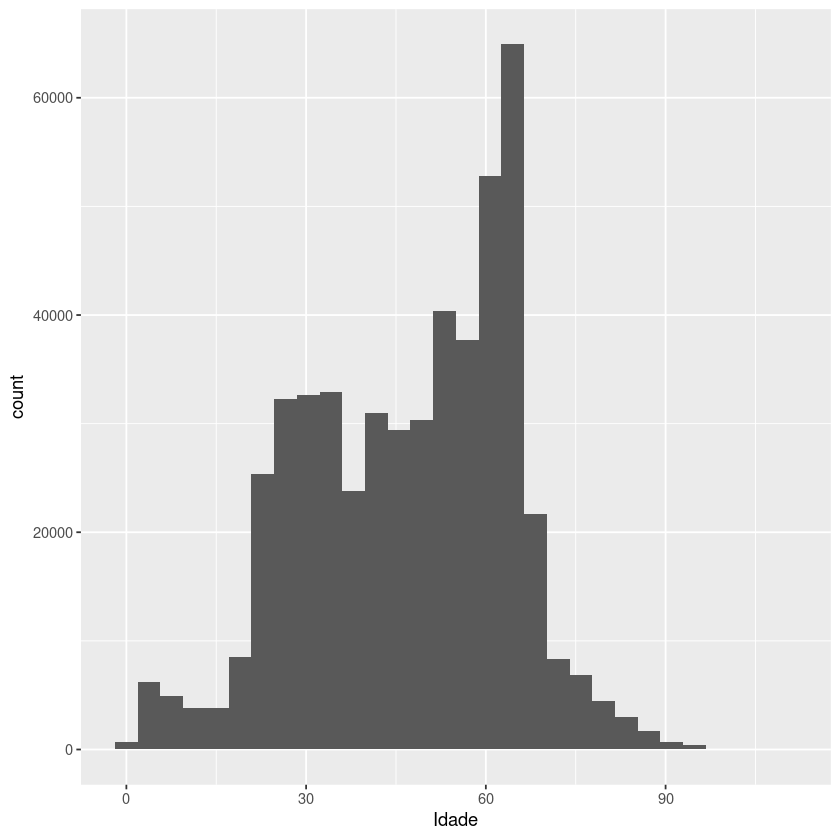

In [51]:
require(lubridate)
require(ggplot2) 

inss_maio_2023$`Nascimento` <- as.Date(inss_maio_2023$`Dt.Nascimento`, format='%d/%m/%Y')
inss_maio_2023$Idade <- year(Sys.Date()) - year(inss_maio_2023$`Nascimento`)

ggplot(inss_maio_2023, aes(Idade)) +
    geom_histogram(na.rm = TRUE)

O R tem uma documentação extensa disponível através do comando ``?`` seguido do nome da função como no exemplo abaixo.

In [1]:
?head

head {utils},R Documentation
x,an object
n,"an integer vector of length up to dim(x) (or 1, for non-dimensioned objects). A logical is silently coerced to integer. Values specify the indices to be selected in the corresponding dimension (or along the length) of the object. A positive value of n[i] includes the first/last n[i] indices in that dimension, while a negative value excludes the last/first abs(n[i]), including all remaining indices. NA or non-specified values (when length(n) < length(dim(x))) select all indices in that dimension. Must contain at least one non-missing value."
keepnums,"in each dimension, if no names in that dimension are present, create them using the indices included in that dimension. Ignored if dim(x) is NULL or its length 1."
addrownums,deprecated - keepnums should be used instead. Taken as the value of keepnums if it is explicitly set when keepnums is not.
...,arguments to be passed to or from other methods.
